# VIZBI Tutorial Session
### Part 2: Cytoscape, IPython, Docker, and reproducible network data visualization workflows

Tuesday, 3/24/2015


### Lesson 3: Reproducible Visualization Workflow

by [Keiichiro Ono](http://keiono.github.io/)

----

![](http://cl.ly/aKS1/tca1.png)


## Background 
You can visualize network data set using easy-to-use Cytoscape GUI and you can save the final result as a ___session file___.  But if you need to create similar visualizations, you need to repeat the manual (point-and-click) operations again.  This will be more and more time consuming process as your data sets grows.  Good news is, you can avoid it by writing your visualization workflow as Notebooks!

In [30]:
import requests
import json
import networkx as nx
from IPython.display import Image
from py2cytoscape import util as cy 

import numpy as np
import pandas as pd

# Basic Setup
PORT_NUMBER = 1234
IP = '10.0.1.6'
BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'

# Header for posting data to the server as JSON
HEADERS = {'Content-Type': 'application/json'}

requests.delete(BASE + 'session')

<Response [200]>

## Visual Style

![](http://cl.ly/aJam/visualstyles.png)

To visuaize your data with Cytoscape, you need to understand its data-to-view mapping mechanism called ___Visual Style___.

### What is a Visual Style?
__Visual Style is a collection of instructions how to map your data to visual properties (or visual variables)__.  To use it to make effective visualizations, you need to understand the following concepts.

In [10]:
# Get a list of all available Visual Styles
vs_url = BASE + 'styles'
res = requests.get(vs_url)
print(json.dumps(res.json(), indent=4))

[
    "default",
    "KEGG Style",
    "Nested Network Style",
    "BioPAX",
    "default black",
    "Minimal",
    "Solid",
    "Sample1",
    "Big Labels",
    "BioPAX_SIF",
    "Universe",
    "Ripple",
    "Directed"
]


#### Visual Properties
Visual Properties, sometimes called [visual variables](http://www.infovis-wiki.net/index.php?title=Visual_Variables) in other applications, are properties of viewable objects, such as color, shape, opacity, size, etc.

You can get the complete list of Visual Properties with the following code:

In [23]:
vps_url = BASE + 'styles/visualproperties'
print(vps_url)

# Let's make it a bit more human readable
res = requests.get(vps_url)
vp_df = pd.DataFrame(res.json(), columns=['visualProperty', 'name', 'targetDataType', 'default'])
vp_df.tail()

http://10.0.1.6:1234/v1/styles/visualproperties


,visualProperty,name,targetDataType,default
98,NODE_VISIBLE,Node Visible,CyNode,true
99,NODE_WIDTH,Node Width,CyNode,60.0
100,NODE_X_LOCATION,Node X Location,CyNode,0.0
101,NODE_Y_LOCATION,Node Y Location,CyNode,0.0
102,NODE_Z_LOCATION,Node Z Location,CyNode,0.0


#### Defaults
By default, there is no mapping from your data to Visual Properties.  __If there is no mapping for a Visual Property, default value will be used.__

In [32]:
directed_style_url = BASE + 'styles/Directed/defaults'
print(directed_style_url)

res = requests.get(directed_style_url)
defaults_df = pd.DataFrame(res.json()['defaults'], columns=['visualProperty', 'value'])
defaults_df.head()

http://10.0.1.6:1234/v1/styles/Directed/defaults


,visualProperty,value
0,EDGE_BEND,
1,EDGE_CURVED,True
2,EDGE_LABEL,
3,EDGE_LABEL_COLOR,#000000
4,EDGE_LABEL_FONT_FACE,"SansSerif,plain,10"


Let's try with actual network data.

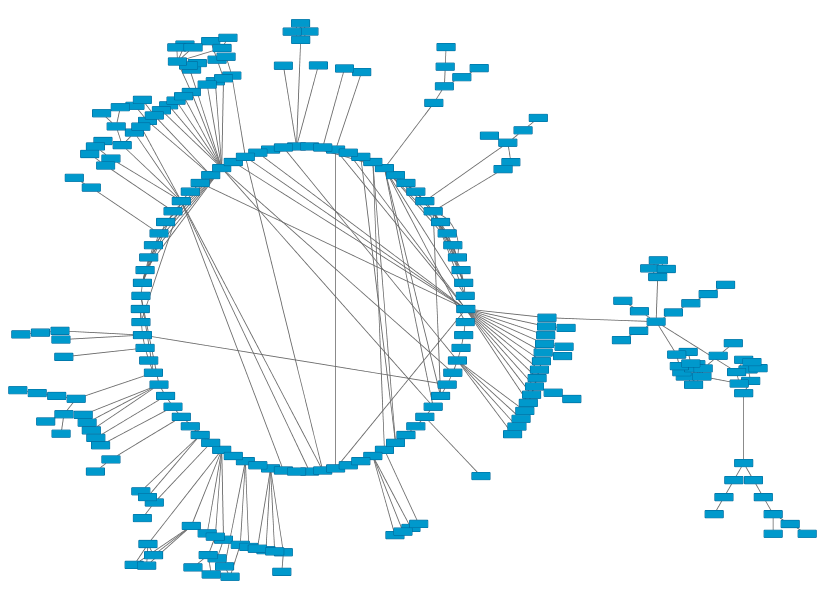

In [35]:
# Load a network file
f = open('data/yeast.json', 'r')
cyjs_network = json.load(f)
cyjs_network['data']['name'] = 'Yeast 1' 

res = requests.post(BASE + 'networks', data=json.dumps(cyjs_network), headers=HEADERS)
suid = res.json()['networkSUID']

# Apply Visual Style "default"
requests.get(BASE + 'apply/styles/default')

Image(BASE+'networks/' + str(suid) + '/views/first.png')

#### Mappings

####